# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import explore as e

# Acquire

* This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey)
* I used the unencoded version of the data
* Each observation is a survey filled out by a Starbucks customer
* Each feature is a question asked in the survey or a timestamp for that survey
* This dataset contains 21 features and 122 observations

[Income Classification in Malaysia: What is B40, M40, and T20](https://www.iproperty.com.my/guides/what-is-b40-m40-t20-in-malaysia/) by Rebecca Hani Romeli was referenced for information regarding Malaysian currency and income levels

In [2]:
df = pd.read_csv('starbucks_survey.csv')

# Prepare

In [3]:
df.drop(columns='Timestamp', inplace=True)

df = df.rename(columns={'Timestamp':'time',
                        '1. Your Gender':'gender', 
                        '2. Your Age':'age_group',
                        '3. Are you currently....?':'employment_status', 
                        '4. What is your annual income?':'annual_income_group',
                        '5. How often do you visit Starbucks?':'visit_frequency',
                        '6. How do you usually enjoy Starbucks?':'dining_type',
                        '7. How much time do you normally  spend during your visit?':'visit_length',
                        '8. The nearest Starbucks\'s outlet to you is...?':'distance_away',
                        '9. Do you have Starbucks membership card?':'membership_card',
                        '10. What do you most frequently purchase at Starbucks?':'most_frequent_purchase',
                        '11. On average, how much would you spend at Starbucks per visit?':'spend_per_visit',
                        '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:':'brand_rating',
                        '13. How would you rate the price range at Starbucks?':'price_rating',
                        '14. How important are sales and promotions in your purchase decision?':'promotion_importance',
                        '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)':'ambiance_rating',
                        '16. You rate the WiFi quality at Starbucks as..':'wifi_rating',
                        '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)':'service_rating',
                        '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?':'gathering_likelyhood',
                        '19. How do you come to hear of promotions at Starbucks? Check all that apply.':'promotions_from',
                        '20. Will you continue buying at Starbucks?':'continue_buying'})
df = df.dropna()

for col in df.columns:
    
    try:
  
        df[f'{col}'] = df[f'{col}'].apply(lambda value: value.strip())
    
    except:
        
        pass

In [4]:
def fix_never(value):
    '''Checks values in a pandas datafrema for "Dine in", "Take away", and "Drive-thru" values
       if it is one of those values return that value otherwise return "Never"'''
    
    if (value != "Take away") & (value != "Dine in") & (value != "Drive-thru"):
    
        return "Never"
    
    else:
        
        return value


df['dining_type'] = df['dining_type'].apply(fix_never)

In [5]:
# create dummy columns for most frequently purchased items
items = ['Coffee',
         'Cold drinks',
         'Pastries',
         'Sandwiches',
         'Juices']

for item in items:

    df[f'{item}'] = df['most_frequent_purchase'].str.contains(f'{item}')

# Explore

### Part I: What are the customers characteristics?
* Gender
* Age
* Employment
* Income
* Frequency of Visit
* Distance from Nearist Starbucks
* spend_per_visit

### Part II: why do customers come to Starbucks?
* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

### Part III: What do customers think of Starbucks?
* brand_rating
* price_rating
* ambiance_rating
* wifi_rating
* service_rating
* continue_buying

### Part IV: Miscellaneous
* membership_card
* promotions_from

## Part I: What are the customers characteristics?

#### What is the gender distribution of Starbucks customers?

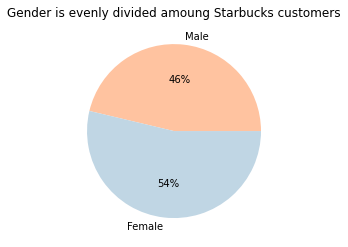

In [6]:
# calling function to generate visual
e.gender_pie(df)

#### What is the age distribution of Starbucks customers?

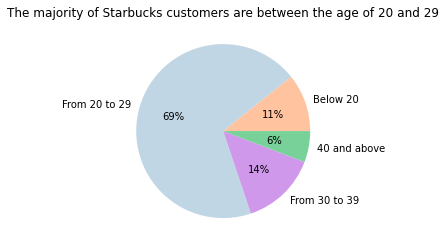

In [7]:
# calling function to generate visual 
e.age_pie(df)

#### What is the employment distribution of Starbucks customers?

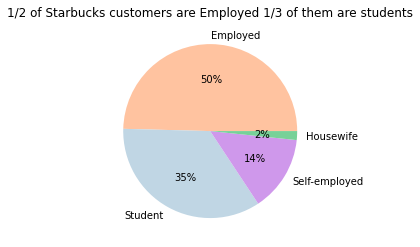

In [8]:
# calling function to generate visual
e.employment_pie(df)

#### What is the income distribution of Starbucks customers?

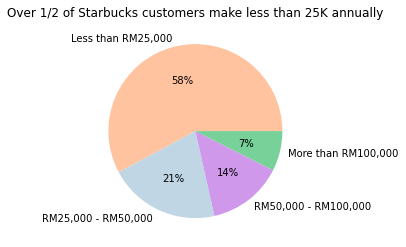

In [9]:
# calling function to generate visual
e.income_pie(df)

#### How often do Starbucks customers visit Satrbucks?

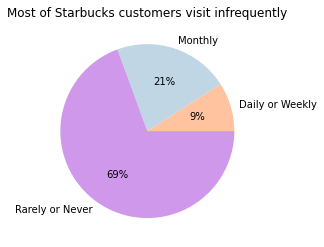

In [10]:
# calling function to generate visual
e.visit_pie(df)

### How many customers live near a Starbucks?

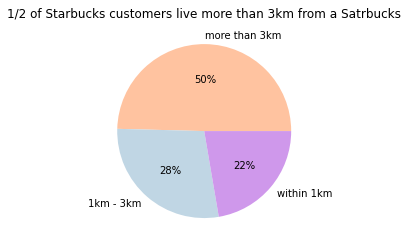

In [11]:
# calling function to generate visual
e.distance_pie(df)

### How much do Customers Spend at Starbucks per visit?

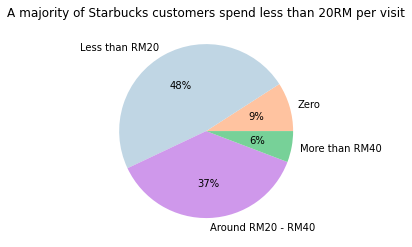

In [12]:
# calling function to generate visual
e.spend_pie(df)

### Majority of Starbucks customers:
* Are young adults aged 20-29
* Make less than RM25,000 annually
* Live more than 3 KM form a Starbucks
* Visit less than once a month
* Spend less than RM20 per visit

### Other findings:
* 1/3 of customers are students and 1/2 are employed in unknown fields
* Customers are nearly evenly split between male and female

### Follow up questions for latter inquiry?
* Do customers that live near Starbucks visit more frequiently?
* Do customers that spend differint amounts per visit represent differint customer groups?
* Do differint Employment types represent differint customer groups?

### A note on Malaysian income:

It is difficult to interpret how servey results regarding income as they are in a currency that is unfamiliar to me.

Malaysia classifies income into three brackets delineating the bottom and middle 40%, and the top 20% of household incomes.

#### The ranges are:

* RM0-RM4,850 for the bottom tier (40%)
* RM4,850-RM8,700 for the mid tier (40%)
* RM8,701-more than RM15,041 for the top tire (20%)

According to the Income Classification in Malaysia: What is B40, M40, and T20 by Rebecca Hani Romeli, a living wage in Malaysia would be RM2,700 per month or RM32,400 per year, almost four times the cutoff for the top 20% of earners.

Because 42% of Starbucks customer base makes more than RM25,000 it would seem that it is serving the top income earners in it's area. a fact that might escape one who looks at the 58% that is below this number. We must keep in mind that a customer who earns less than RM25,000 is still in the top 20% of income earning households, though as suggested above being in the top 20% of earners does not garentee the RM32,400 one would need for a living wage.  

In [13]:
df.dining_type.value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never          6
Name: dining_type, dtype: int64

### Part II: Why do customers come to Starbucks?

* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

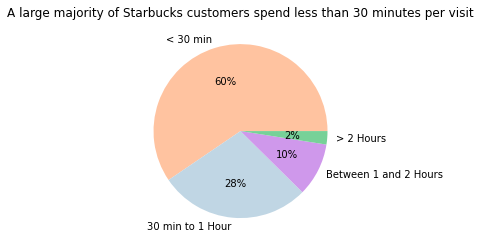

In [14]:
# set values and labels for chart
values = [len(df.visit_length[df.visit_length == 'Below 30 minutes']), 
          len(df.visit_length[df.visit_length == 'Between 30 minutes to 1 hour']),
          len(df.visit_length[df.visit_length == 'Between 1 hour to 2 hours']),
          len(df.visit_length[(df.visit_length == 'Between 2 hours to 3 hours') 
                            | (df.visit_length == 'More than 3 hours')])]

labels = ['< 30 min','30 min to 1 Hour', 'Between 1 and 2 Hours', '> 2 Hours'] 

# generate and show chart
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4', '#cf98eb', '#77d198'])
plt.title('A large majority of Starbucks customers spend less than 30 minutes per visit')
plt.show()

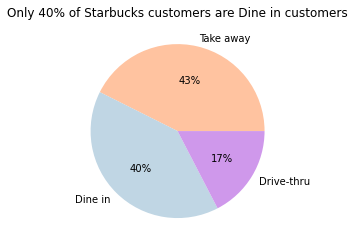

In [15]:
# set values and labels for chart
values = [len(df.dining_type[df.dining_type == 'Take away']), 
          len(df.dining_type[df.dining_type == 'Dine in']),
          len(df.dining_type[df.dining_type == 'Drive-thru'])]

labels = ['Take away','Dine in', 'Drive-thru'] 

# generate and show chart
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4', '#cf98eb'])
plt.title('Only 40% of Starbucks customers are Dine in customers')
plt.show()

* 60% of customers place pick up orders 

In [17]:
df.most_frequent_purchase.value_counts()

Coffee                                           65
Cold drinks                                      25
Coffee;Pastries                                   6
Coffee;Cold drinks                                6
Coffee;Sandwiches                                 3
Cold drinks;Juices;Pastries                       2
Pastries                                          2
never                                             1
Cold drinks;Pastries;Sandwiches                   1
Jaws chip                                         1
Cold drinks;Never                                 1
Coffee;Juices;Pastries;Sandwiches                 1
Nothing                                           1
Never                                             1
Coffee;Pastries;Sandwiches                        1
Coffee;Cold drinks;Pastries;Sandwiches            1
Cold drinks;Pastries                              1
Coffee;Cold drinks;Juices;Pastries;Sandwiches     1
cake                                              1
Name: most_f

TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]

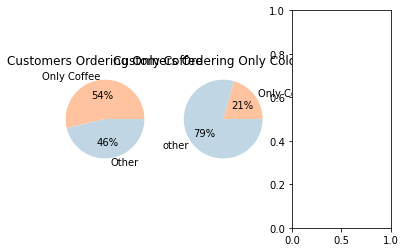

In [19]:
    # create axis object
    fig, (ax1,ax2,ax3) = plt.subplots(1,3)
    
    # create pie chart and assign to axis object
    values = [len(df.most_frequent_purchase[df.most_frequent_purchase == 'Coffee']),
              len(df.most_frequent_purchase[df.most_frequent_purchase != 'Coffee'])]
    labels = ['Only Coffee', 'Other']

    ax1.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
    ax1.title.set_text('Customers Ordering Only Coffee')

    # create pie chart and and assign to axis object
    values = [len(df.most_frequent_purchase[df.most_frequent_purchase == 'Cold drinks']),
              len(df.most_frequent_purchase[df.most_frequent_purchase != 'Cold drinks'])]
    labels = ['Only Cold drink', 'other']

    ax2.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
    ax2.title.set_text('Customers Ordering Only Cold Drink')
    
    # create pie chart and assign to axis object
    values = [len(df.most_frequent_purchase[df.most_frequent_purchase == 'Coffee'
                                               | df.most_frequent_purchase == 'Cold drinks']),
              len(df.most_frequent_purchase[df.most_frequent_purchase != 'Coffee'
                                               & df.most_frequent_purchase != 'Cold drinks'])]
    labels = ['Just Drink', 'Other']

    ax3.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
    ax3.title.set_text('Customers Ordering Just a Drink')

    # display charts
    plt.tight_layout()
    plt.show()